In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [10]:
d  =pd.read_csv("nutrition.csv")
df = pd.DataFrame(d)
df

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [19]:
df.drop(df.columns[df.columns.str.contains('_USRDA')].values, inplace=True, axis=1)
dfd = df.drop(columns = ['FoodGroup','ShortDescrip', 'Descrip', 'CommonName', 'MfgName', 'ScientificName'])
dfd

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,90240,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,90480,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90560,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


In [51]:
scaler = StandardScaler().fit(dfd)
dfd0=scaler.transform(dfd) 
pca = PCA()
pca.fit(dfd0)

PCA()

In [52]:
cov_mat = np.cov(dfd0 , rowvar = False)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
pd.DataFrame(eigen_values)


,0
0,0.003793
1,0.158906
2,0.208709
3,0.238121
4,0.255265
5,0.315211
6,0.323060
7,0.336938
8,0.404270
9,0.468653


In [53]:
e = pd.DataFrame({"Dimension" : ["Dim" + str(x + 1) for x in range(24)],"valeurs propres" : eigen_values,"% valeurs propres" : np.round(eigen_values),
"% cum. var. propres" : np.round(np.cumsum(eigen_values))})

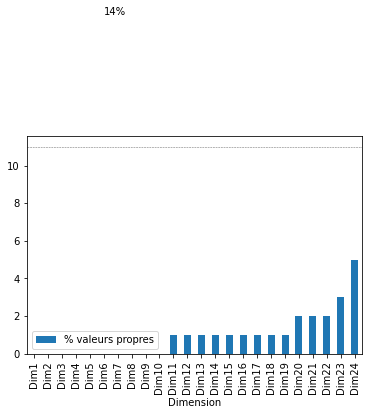

In [54]:

e.plot.bar(x = "Dimension", y = "% valeurs propres") # permet un diagramme enbarres
plt.text(5, 18, "14%") # ajout de texte
plt.axhline(y = 11, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 14= 100 / 7 
plt.show()

In [48]:
dfd1 = pd.DataFrame({
 "Dim1" : dfd0[:,0],
 "Dim2" : dfd0[:,1],
})

In [57]:
dfd1.head()

,Dim1,Dim2
0,-1.568911,2.896234
1,-1.568802,2.896234
2,-1.568694,3.834956
3,-1.568585,0.747208
4,-1.568477,0.853478


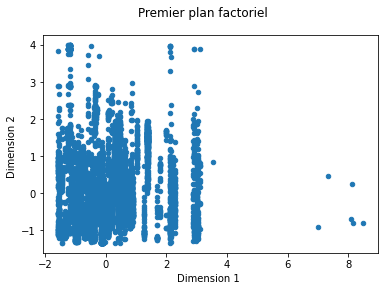

In [58]:
dfd1.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 ") # modification du nom de l'axe X
plt.ylabel("Dimension 2 ") # idem pour axe Y
plt.suptitle("Premier plan factoriel ") # titre général
plt.show()

In [62]:
couleurs = ['red', 'blue']
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace = 0.7, wspace = 0.2)
for cont, coul in couleurs:
 ax = fig.add_subplot(2, 3, position[cont] + 1)
 temp =dfd1.query('Origin == "' + cont + '"')
 temp.plot.scatter(x = "Dim1", y = "Dim2", c = [coul], ax = ax)
 ax.set_title(cont)
 ax.set_xlim(dfd1.Dim1.quantile([0, 1])) # permet d'avoir min et max
 ax.set_ylim(dfd1.Dim2.quantile([0, 1])) # idem
 ax.set_xlabel("")
 ax.set_ylabel("")
plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 864x864 with 0 Axes>